<a href="https://colab.research.google.com/github/AnukaMithara/Research-Machine-Learning/blob/main/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EC9630:  MACHINE LEARNING
# LAB 03
### KARUNANAYAKA D.W.A.M.
### 2019/E/054
### 31 MAY 2023

## 1.  Study  the  dataset  ’Fashion-MNIST’  in  Keras.   Answer  the  following questions in relation to the above dataset.

### (a)  Find out whether it can be used for regression or classification.
####       The 'Fashion-MNIST' dataset can be used for classification tasks.
  

### (b)  What is the size of the images?
####        The size of the images in the 'Fashion-MNIST' dataset is 28x28 pixels.
   

### (c)  How many images are there in the train data?
####        The number of images in the train data can vary, depending on how the dataset is split. Typically, the 'Fashion-MNIST' dataset 

### (d)  State the number of images in test data.
####        The number of images in the test data is also variable depending on the dataset split, but generally, the 'Fashion-MNIST' dataset    

### (e)  How many classes are there in the data?  Write down those classes.
####        T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

## 2.  Load that dataset directly from Keras using Python.

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
lebels = y_test

4422102/4422102 [==============================] - 0s 0us/step


## 3.  View some images in training data, for example draw the 11th image in your training data. 

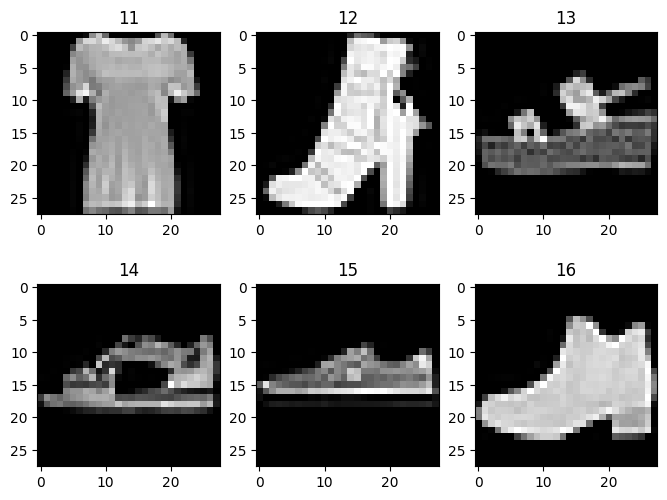

In [2]:
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Get the 11th to 16th images in the training dataset
images = x_train[10:16]

# Plot the images with labels
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
for i in range(2):
    for j in range(3):
        axes[i, j].imshow(images[i * 3 + j], cmap='gray')
        axes[i, j].set_title(i * 3 + j + 11)

plt.show()


## 4.  Normalize your data (train and test) between 0 and 1. Hint:  This is a grayscale image has pixel values between 0 and 255.

In [3]:
from keras.utils import to_categorical

x_train = x_train / 255.0
x_test = x_test / 255.0


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## 5.  Now divide the training data into two:  Validation images (first 5000 images from the initial training data) and Training images (rest of the images in your initial training data).

In [4]:
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

print("Size of Validation images set of x: ", x_val.shape)
print("Size of Validation images set of y: ", y_val.shape)
print("\nSize of Training images set of x: ", x_train.shape)
print("Size of Training images set of y: ", y_train.shape)

Size of Validation images set of x:  (5000, 28, 28)
Size of Validation images set of y:  (5000, 10)

Size of Training images set of x:  (55000, 28, 28)
Size of Training images set of y:  (55000, 10)


## 6.  Initialize the weight and bias parameters of your model.

## 7.  Now build the neural network model with the following characteristics:
### (a)  One Flatten layer as the input layer.
### (b)  Two dense relu layers as hidden layers.
### (c)  A dense softmax layer as the output layer.

In [5]:
import tensorflow as tf

snn = tf.keras.models.Sequential()

# input layer
snn.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# hidden layer 1
snn.add(tf.keras.layers.Dense(300, activation="relu"))

# hidden layer 2
snn.add(tf.keras.layers.Dense(100, activation="relu"))

# output layer
snn.add(tf.keras.layers.Dense(10, activation="softmax"))

##  8.  Answer the following questions.
### (a)  What is the use of Flatten layer?
#### The Flatten layer is used to convert the input data from a 2D array to a 1D array. This is necessary because the next layer in the model, the Dense layer, expects a 1D array as input.

### (b)  Generally, softmax activation function is used in the output layer of the classification networks.  Why?
#### Because the softmax activation function transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes.

# 9.  Print the summary of the network.

In [6]:
snn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## 10.  Now compile the model with the desired loss function, optimizer and metrics.

In [7]:
snn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


## 11.  Now train your model on the training data and validate your model.

In [8]:
snn.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
430/430 [==============================] - 5s 8ms/step - loss: 0.5210 - accuracy: 0.8173 - val_loss: 0.4126 - val_accuracy: 0.8578
Epoch 2/10
430/430 [==============================] - 3s 8ms/step - loss: 0.3751 - accuracy: 0.8652 - val_loss: 0.3777 - val_accuracy: 0.8618
Epoch 3/10
430/430 [==============================] - 4s 9ms/step - loss: 0.3346 - accuracy: 0.8787 - val_loss: 0.3248 - val_accuracy: 0.8832
Epoch 4/10
430/430 [==============================] - 4s 10ms/step - loss: 0.3107 - accuracy: 0.8865 - val_loss: 0.3465 - val_accuracy: 0.8694
Epoch 5/10
430/430 [==============================] - 3s 8ms/step - loss: 0.2944 - accuracy: 0.8907 - val_loss: 0.3032 - val_accuracy: 0.8882
Epoch 6/10
430/430 [==============================] - 4s 8ms/step - loss: 0.2726 - accuracy: 0.8993 - val_loss: 0.3001 - val_accuracy: 0.8918
Epoch 7/10
430/430 [==============================] - 5s 12ms/step - loss: 0.2601 - accuracy: 0.9032 - val_loss: 0.2991 - val_accuracy: 0.8928
Epoc

## 12.  Evaluate your model on the test data.  What is the accuracy of yourmodel on the test data?

In [9]:
snn.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.3283 - accuracy: 0.8828


[0.32831400632858276, 0.8827999830245972]

## 13.  Now  take  the  first  five  samples  of  test  data.   Print  the  actual  targetclasses and the predicted target classes of those five samples. 

In [10]:
import numpy as np 

for i in range(5):
  print(f"\nActual target class: {lebels[i]}")
  predict_x=snn.predict(x_test[i:i+1])
  print(f"Predicted target class: {np.argmax(predict_x,axis=1)}")



Actual target class: 9
1/1 [==============================] - 0s 89ms/step
Predicted target class: [9]

Actual target class: 2
1/1 [==============================] - 0s 20ms/step
Predicted target class: [2]

Actual target class: 1
1/1 [==============================] - 0s 21ms/step
Predicted target class: [1]

Actual target class: 1
1/1 [==============================] - 0s 20ms/step
Predicted target class: [1]

Actual target class: 6
1/1 [==============================] - 0s 20ms/step
Predicted target class: [6]
